In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim
from tqdm import tqdm 

# Punto 5

In [2]:
def System(r,t,q):
    x = r
    dxdt = x**q
    
    return dxdt

In [3]:
def solution(t, q): 
    return (t*(1-q)+1)**(1/(1-q))


def solution_q1(t, q): 
    return (np.e)**(t)


In [4]:
def Integrator2(f,r0,t,q):
    
    h = t[1] - t[0]
    print(h)
    
    x = np.zeros_like(t)
    
    x[0] = r0[0]

    
    K1 = np.zeros(1)
    K2 = np.zeros(1)
    
    # Las pendientes instantaneas
    R = np.zeros(1)

    for i in range(1,len(t)):
        
        R = np.array([x[i-1]])
        
        K1 = f(R,t[i-1],q)
        
        R = np.array([x[i-1]+h*K1[0]])
        
        K2 = f(R,t[i-1]+h,q)
        
        x[i] = x[i-1] + 0.5*h*(K1[0]+K2[0])

        
    return x

In [5]:
r0 = [1.]
h = 0.01
t = np.arange(0,10+h,h)


0.01


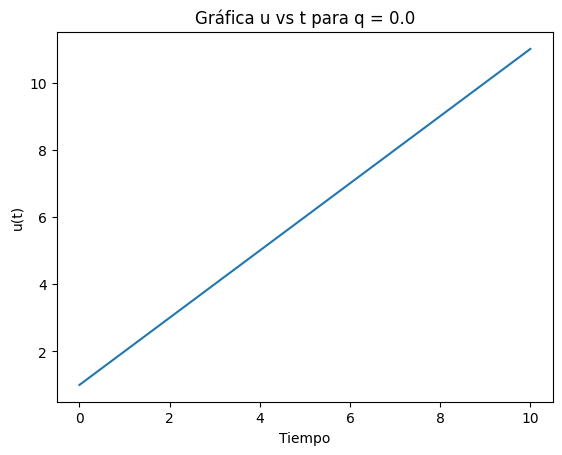

0.01


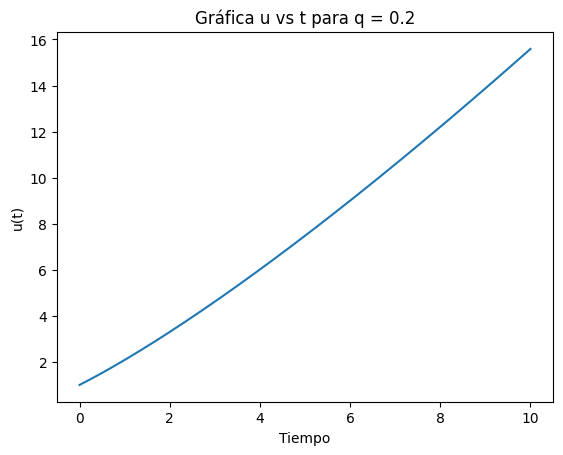

0.01


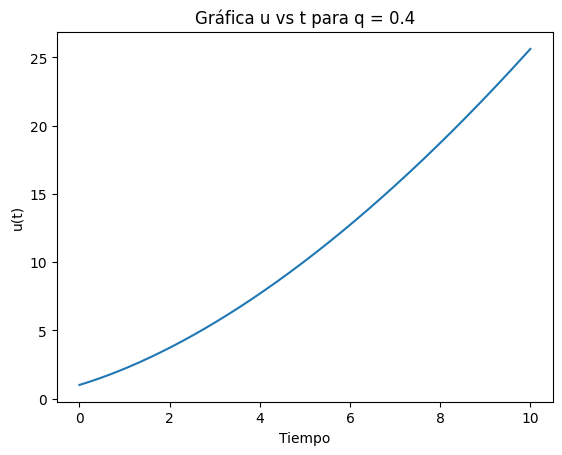

0.01


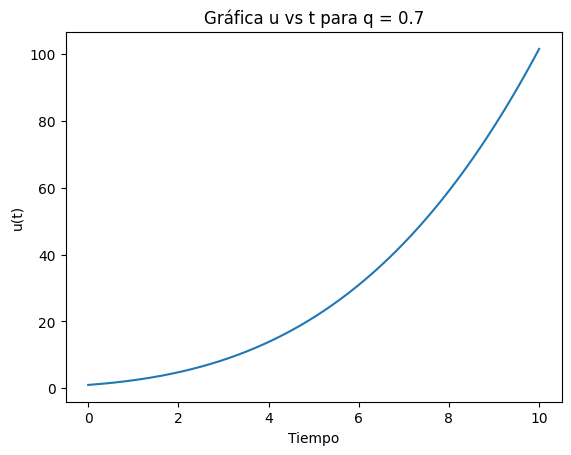

0.01


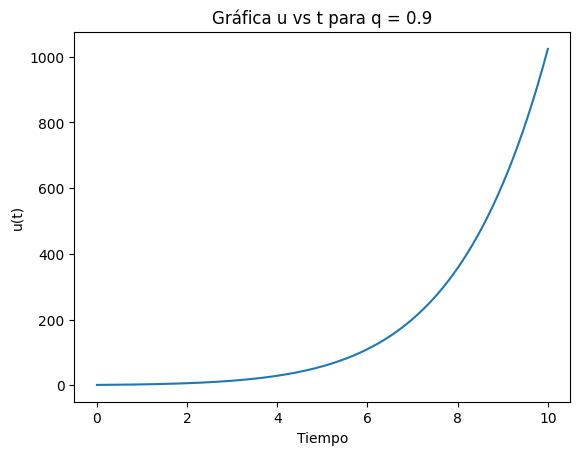

0.01


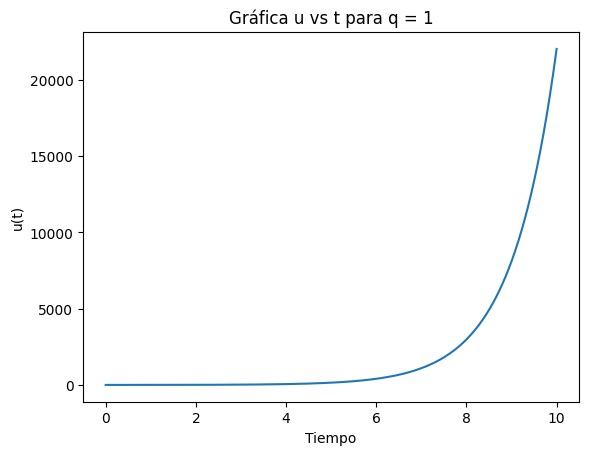

In [6]:
def plot(t,q): 
    x = Integrator2(System,r0,t,q)
    #El codigo comentado permite plotear la solución analitica
    """if q ==1: 
        real = solution_q1(t,q)
    else: 
        real = solution(t,q)
    plt.plot(t,real)"""
    plt.plot(t,x)
    plt.title("Gráfica u vs t para q = {}".format(q))
    plt.xlabel("Tiempo")
    plt.ylabel("u(t)")
   
    plt.show()

plot(t,0.)
plot(t,0.2)
plot(t,0.4)
plot(t,0.7)
plot(t,0.9)
plot(t,1)



# Punto 6

In [7]:
class Planeta:
    
    def __init__(self, e, a,alpha, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        self.alpha = alpha #Correccion
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1-self.e)/(self.a_*(1.+self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = ((-(self.G)/(d**3))*self.r)*(1+(self.alpha/d**2))
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt+(1/2)*self.a*self.dt**2
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = self.r + self.v*self.dt +(1/2)*self.a*self.dt**2

            self.vf = self.v +(1/2)*self.dt*(self.a+ self.a) # La aceleracion en este caso es independiente del tiempo! por eso es lo mismo 
            
    
            self.r = self.rf
            self.v = self.vf
    
    def SetPosition(self,i):
        #print(self.R[1000], "voy en el {}".format(i))
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        angle = []
        positionPerihelium=[]
        
        unitaryVector =np.zeros(3)
        unitaryVector[0]=-1
        
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                plt.scatter(self.R[i][0],self.R[i][0])
                timeup.append(self.t[i])
                positionPerihelium.append(self.R[i])

                                    
                        
            
        return timeup,positionPerihelium

In [8]:
dt = 1*10**(-6)
tmax = 4
t = np.arange(0.,tmax,dt)

In [9]:
Mercurio = Planeta(0.2056,0.307,1.1*10**(-8), t)

In [10]:
def RunSimulation(t,Planeta):

    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):

        Planeta.Evolution(it)
            
            
    return Planeta

In [11]:
Planeta = RunSimulation(t,Mercurio)

Running simulation:   0%|          | 13729/4000000 [00:00<01:28, 45240.60 Steps/s]

Running simulation: 100%|██████████| 4000000/4000000 [01:20<00:00, 49608.87 Steps/s]


In [12]:
scale = 1
t1 = t[::scale]

58 58
[1.000000e-06 3.356500e-02 1.008170e-01 1.681950e-01 2.356990e-01
 3.033290e-01 3.710850e-01 4.389670e-01 5.069760e-01 5.751110e-01
 6.433730e-01 7.117620e-01 7.802780e-01 8.489210e-01 9.176920e-01
 9.865900e-01 1.055615e+00 1.124768e+00 1.194049e+00 1.263458e+00
 1.332995e+00 1.402660e+00 1.472454e+00 1.542376e+00 1.612427e+00
 1.682607e+00 1.752915e+00 1.823353e+00 1.893920e+00 1.964616e+00
 2.035442e+00 2.106398e+00 2.177483e+00 2.248699e+00 2.320044e+00
 2.391520e+00 2.463126e+00 2.534862e+00 2.606730e+00 2.678728e+00
 2.750857e+00 2.823117e+00 2.895508e+00 2.968031e+00 3.040685e+00
 3.113471e+00 3.186389e+00 3.259439e+00 3.332621e+00 3.405935e+00
 3.479382e+00 3.552961e+00 3.626672e+00 3.700517e+00 3.774495e+00
 3.848606e+00 3.922850e+00 3.997227e+00]


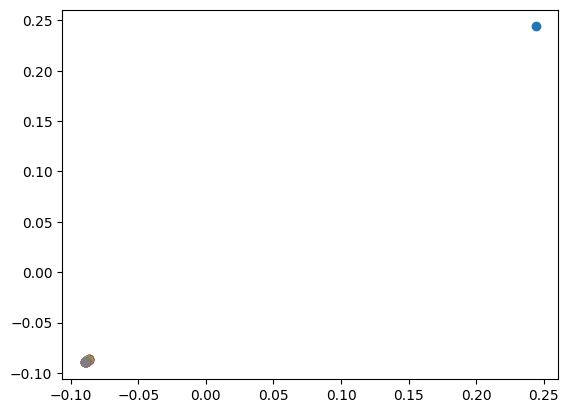

In [13]:
t,position = Planeta.GetPerihelio()
print(len(t),len(position))
t = np.array(t)
position = np.array(position)
print(t)


[3.14155491e+00 5.25640428e-04 5.65854730e-04 5.35746032e-04
 4.76443913e-04 4.28991562e-04 4.34346482e-04 5.33381181e-04
 4.68517518e-04 5.79344668e-04 6.08633726e-04 5.97695975e-04
 5.87757498e-04 6.19959878e-04 4.38540036e-04 3.81804405e-04
 4.90643386e-04 5.09809381e-04 4.80790981e-04 4.44992800e-04
 4.43736152e-04 5.18259734e-04 4.14926611e-04 4.70107447e-04
 4.30502603e-04 3.37774034e-04 5.27295104e-04 4.52726207e-04
 4.49526241e-04 5.59030188e-04 5.29689148e-04 4.03417087e-04
 5.14357839e-04 3.19392605e-04 4.44570998e-04 3.47593360e-04
 3.62036436e-04 5.29331100e-04 3.09129708e-04 3.25374437e-04
 3.28892818e-04 3.61525190e-04 4.65032941e-04 3.91452111e-04
 4.72513141e-04 4.60573198e-04 3.97796401e-04 3.26267890e-04
 2.87994472e-04 3.24905259e-04 1.90866935e-04 2.16110989e-04
 4.42335643e-04 3.36601626e-04 2.28907012e-04 1.61422710e-04
 1.76243191e-04 3.15387113e-04]


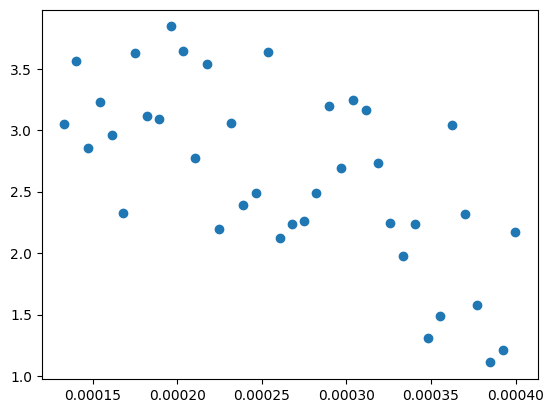

In [19]:
angles = []

for r in position:

    rUnitary = r/np.linalg.norm(r)
    unitaryVector =np.zeros(3)
    unitaryVector[0]=-1
    angles.append(np.arccos(np.dot(unitaryVector,rUnitary)))

angles = np.array(angles)
print(angles)

angles = angles*60*180*2/np.pi
t = t/100

plt.scatter(t[20:],angles[20:])
    
    
    

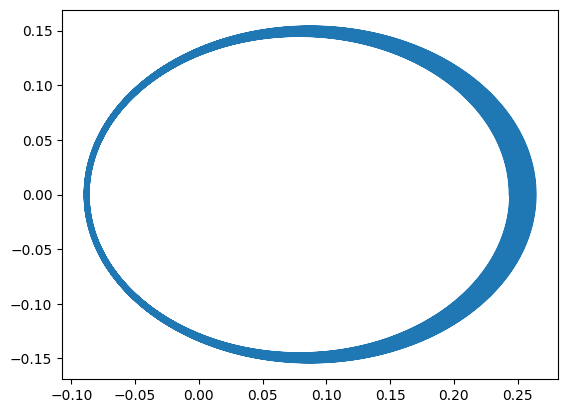

In [20]:
Mx = Mercurio.GetPosition(scale)[:,0]
My = Mercurio.GetPosition(scale)[:,1]
plt.plot(Mx,My)


[ 4.21486378e+00 -5.95341848e+03]


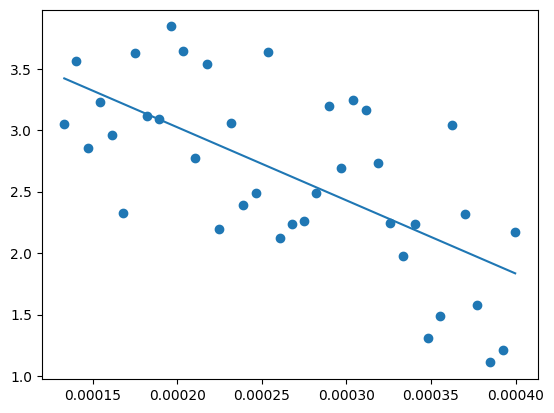

In [21]:
def GetFit(x,y,n=1):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)
    
    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
        
    return y



param = GetFit(t[20:],angles[20:])
print(param)

regresion = GetModel(t[20:],param)

plt.plot(t[20:], regresion)
plt.scatter(t[20:],angles[20:])
    